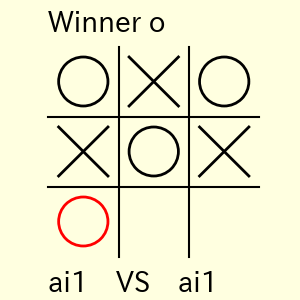

In [1]:
from util import gui_play
from ai import ai1

gui_play(ai=[ai1, ai1])

In [2]:
from marubatsu import Marubatsu

def draw_board(self, ax, ai):           
    # Axes の内容をクリアして、これまでの描画内容を削除する
    ax.clear()
    
    # y 軸を反転させる
    ax.invert_yaxis()
    
    # 枠と目盛りを表示しないようにする
    ax.axis("off")   
    
    # ゲームの決着がついていた場合は背景色を
    facecolor = "white" if self.status == Marubatsu.PLAYING else "lightyellow"
    ax.figure.set_facecolor(facecolor)
        
    # 上部のメッセージを描画する
    # 対戦カードの文字列を計算する
    names = []
    for i in range(2):
        names.append("人間" if ai[i] is None else ai[i].__name__)
    ax.text(0, 3.5, f"{names[0]}　VS　{names[1]}", fontsize=20)   
    
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 引き分けの場合
    elif self.status == Marubatsu.DRAW:
        text = "Draw game"
    # 決着がついていれば勝者を表示する
    else:
        text = "Winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)
    
    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color) 
            
    update_widgets_status()
    
Marubatsu.draw_board = draw_board

NameError: name 'update_widgets_status' is not defined

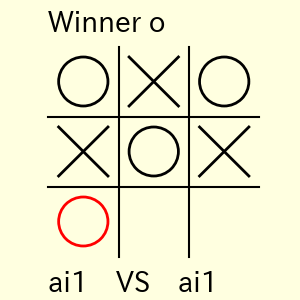

In [3]:
gui_play(ai=[ai1, ai1])

In [4]:
def draw_board(self, ax, ai):           
    # Axes の内容をクリアして、これまでの描画内容を削除する
    ax.clear()
    
    # y 軸を反転させる
    ax.invert_yaxis()
    
    # 枠と目盛りを表示しないようにする
    ax.axis("off")   
    
    # ゲームの決着がついていた場合は背景色を
    facecolor = "white" if self.status == Marubatsu.PLAYING else "lightyellow"
    ax.figure.set_facecolor(facecolor)
        
    # 上部のメッセージを描画する
    # 対戦カードの文字列を計算する
    names = []
    for i in range(2):
        names.append("人間" if ai[i] is None else ai[i].__name__)
    ax.text(0, 3.5, f"{names[0]}　VS　{names[1]}", fontsize=20)   
    
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 引き分けの場合
    elif self.status == Marubatsu.DRAW:
        text = "Draw game"
    # 決着がついていれば勝者を表示する
    else:
        text = "Winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)
    
    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color)            

    # ボタンのウィジェットの状態を設定する
    def set_button_status(button, disabled):
        button.disabled = disabled
        button.style.button_color = "lightgray" if disabled else "lightgreen"

    # ウィジェットの状態を更新する        
    def update_widgets_status():
        # 0 手目と最後の着手を行った局面で、特定のリプレイに関するボタンを操作できないようにする
        set_button_status(first_button, self.move_count <= 0)
        set_button_status(prev_button, self.move_count <= 0)
        set_button_status(next_button, self.move_count >= len(self.board_records) - 1)
        set_button_status(last_button, self.move_count >= len(self.board_records) - 1)

    update_widgets_status()
    
Marubatsu.draw_board = draw_board

NameError: name 'first_button' is not defined

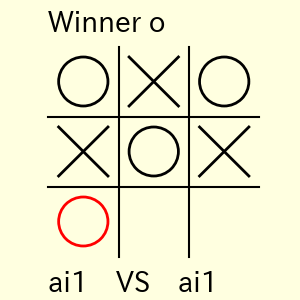

In [5]:
gui_play(ai=[ai1, ai1])

In [6]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import math
from copy import deepcopy

def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
  
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        # 1 行目の UI を作成する
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # 〇 と × の Dropdown を格納する list
        dropdown_list = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
            # Dropdown の description を計算する
            description = "〇" if i == 0 else "×"
            dropdown_list.append(
                widgets.Dropdown(
                    options=ai_dict,
                    description=description,
                    layout=widgets.Layout(width="100px"),
                    style={"description_width": "20px"},
                    value=select_values[i],
                )
            )
        
        # ボタンを作成するローカル関数を定義する 
        def create_button(description, width):
            return widgets.Button(
                description=description,
                layout=widgets.Layout(width=f"{width}px"),
                style={"button_color": "lightgreen"},
            )
        
        # 変更、リセットボタンを作成する
        change_button = create_button("変更", 100)
        reset_button = create_button("リセット", 100)
              
        # 変更ボタンのイベントハンドラを定義する
        def on_change_button_clicked(b):
            for i in range(2):
                ai[i] = None if dropdown_list[i].value == "人間" else dropdown_list[i].value
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

        # リセットボタンのイベントハンドラを定義する
        def on_reset_button_clicked(b):
            self.restart()
            on_change_button_clicked(b)
            
        # イベントハンドラをボタンに結びつける
        change_button.on_click(on_change_button_clicked)
        reset_button.on_click(on_reset_button_clicked)        
        
        # 2 行目の UI を作成する
        # リプレイのボタンを作成する
        self.first_button = create_button("<<", 100)
        self.prev_button = create_button("<", 100)
        self.next_button = create_button(">", 100)
        self.last_button = create_button(">>", 100)
        
        def change_step(step):
            # step が負の場合は 0 に修正する
            step = max(0, min(len(self.board_records) - 1, step))
            # step 手目のゲーム盤のデータをコピーし、board に代入する
            self.board = deepcopy(self.board_records[step])
            # 手数を表す step を move_count に代入する
            self.move_count = step
            # 手番を計算する。step が偶数の場合は 〇 の 手番
            self.turn = Marubatsu.CIRCLE if step % 2 == 0 else Marubatsu.CROSS
            # status 属性を judget を使って計算する
            self.status = self.judge()
            # 直前の着手を計算する
            self.last_move = self.records[step]
            # 描画を更新する
            self.draw_board(ax, ai)
        
        def on_first_button_clicked(b):
            change_step(0)

        def on_prev_button_clicked(b):
            change_step(self.move_count - 1)

        def on_next_button_clicked(b):
            change_step(self.move_count + 1)
            
        def on_last_button_clicked(b):
            change_step(len(self.board_records) - 1)

        self.first_button.on_click(on_first_button_clicked)
        self.prev_button.on_click(on_prev_button_clicked)
        self.next_button.on_click(on_next_button_clicked)
        self.last_button.on_click(on_last_button_clicked)

        # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
        hbox1 = widgets.HBox([dropdown_list[0], dropdown_list[1], change_button, reset_button])
        # リプレイ機能のボタンを横に配置した HBox を作成する
        hbox2 = widgets.HBox([self.first_button, self.prev_button, self.next_button, self.last_button]) 
        # hbox1 と hbox2 を縦に配置した VBox を作成し、表示する
        display(widgets.VBox([hbox1, hbox2]))        
  
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax, ai)
                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

In [7]:
def draw_board(self, ax, ai):           
    # Axes の内容をクリアして、これまでの描画内容を削除する
    ax.clear()
    
    # y 軸を反転させる
    ax.invert_yaxis()
    
    # 枠と目盛りを表示しないようにする
    ax.axis("off")   
    
    # ゲームの決着がついていた場合は背景色を
    facecolor = "white" if self.status == Marubatsu.PLAYING else "lightyellow"
    ax.figure.set_facecolor(facecolor)
        
    # 上部のメッセージを描画する
    # 対戦カードの文字列を計算する
    names = []
    for i in range(2):
        names.append("人間" if ai[i] is None else ai[i].__name__)
    ax.text(0, 3.5, f"{names[0]}　VS　{names[1]}", fontsize=20)   
    
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 引き分けの場合
    elif self.status == Marubatsu.DRAW:
        text = "Draw game"
    # 決着がついていれば勝者を表示する
    else:
        text = "Winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)
    
    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color)            

    # ボタンのウィジェットの状態を設定する
    def set_button_status(button, disabled):
        button.disabled = disabled
        button.style.button_color = "lightgray" if disabled else "lightgreen"

    # ウィジェットの状態を更新する        
    def update_widgets_status():
        # 0 手目と最後の着手を行った局面で、特定のリプレイに関するボタンを操作できないようにする
        set_button_status(self.first_button, self.move_count <= 0)
        set_button_status(self.prev_button, self.move_count <= 0)
        set_button_status(self.next_button, self.move_count >= len(self.board_records) - 1)
        set_button_status(self.last_button, self.move_count >= len(self.board_records) - 1)

    update_widgets_status()    

Marubatsu.draw_board = draw_board

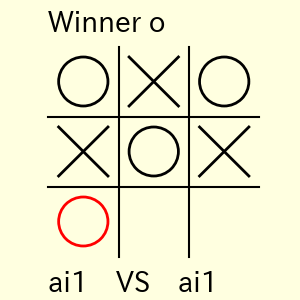

In [8]:
gui_play(ai=[ai1, ai1])

In [9]:
class Marubatsu_GUI:
    def __init__(self, mb, ai, ai_dict=None, params=None, size=3):
        # ai_dict が None の場合は、空の list で置き換える
        if ai_dict is None:
            ai_dict = {}
        # params が None の場合のデフォルト値を設定する
        if params is None:
            params = [{}, {}]

        self.mb = mb
        self.ai = ai
        self.ai_dict = ai_dict
        self.ai_params = params
        self.size = size         
        
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')

In [10]:
def create_dropdown(self):
    # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
    select_values = []
    # 〇 と × の Dropdown を格納する list
    self.dropdown_list = []
    # ai に代入されている内容を ai_dict に追加する
    for i in range(2):
        # ラベルと項目の値を計算する
        if self.ai[i] is None:
            label = "人間"
            value = "人間"
        else:
            label = self.ai[i].__name__        
            value = self.ai[i]
        # value を select_values に常に登録する
        select_values.append(value)
        # value が ai_values に登録済かどうかを判定する
        if value not in self.ai_dict.values():
            # 項目を登録する
            self.ai_dict[label] = value
    
        # Dropdown の description を計算する
        description = "〇" if i == 0 else "×"
        self.dropdown_list.append(
            widgets.Dropdown(
                options=self.ai_dict,
                description=description,
                layout=widgets.Layout(width="100px"),
                style={"description_width": "20px"},
                value=select_values[i],
            )
        )    
    
Marubatsu_GUI.create_dropdown = create_dropdown

In [11]:
def display_widgets(self):
    hbox = widgets.HBox([self.dropdown_list[0], self.dropdown_list[1]])
    display(hbox) 
    
Marubatsu_GUI.display_widgets = display_widgets   

In [12]:
def __init__(self, mb, ai, ai_dict=None, params=None, size=3):
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]

    self.mb = mb
    self.ai = ai
    self.ai_dict = ai_dict
    self.size = size
    
    # %matplotlib widget のマジックコマンドを実行する
    get_ipython().run_line_magic('matplotlib', 'widget')
    
    self.create_dropdown()
    self.display_widgets()
    
Marubatsu_GUI.__init__ = __init__

In [13]:
mb = Marubatsu()
mb_gui = Marubatsu_GUI(mb, ai=[None, None])

In [14]:
@staticmethod
def create_button(description, width):
    return widgets.Button(
        description=description,
        layout=widgets.Layout(width=f"{width}px"),
        style={"button_color": "lightgreen"},
    )
    
Marubatsu_GUI.create_button = create_button

In [15]:
display(Marubatsu_GUI.create_button("リセット", 100))

Button(description='リセット', layout=Layout(width='100px'), style=ButtonStyle(button_color='lightgreen'))

In [16]:
def create_widgets(self):
    # AI を選択する Dropdown を作成する
    self.create_dropdown()
    # 変更、リセットボタンを作成する
    self.change_button = self.create_button("変更", 100)
    self.reset_button = self.create_button("リセット", 100)
    # リプレイのボタンを作成する
    self.first_button = self.create_button("<<", 100)
    self.prev_button = self.create_button("<", 100)
    self.next_button = self.create_button(">", 100)
    self.last_button = self.create_button(">>", 100)    
    
Marubatsu_GUI.create_widgets = create_widgets

In [17]:
def display_widgets(self):
    # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
    hbox1 = widgets.HBox([self.dropdown_list[0], self.dropdown_list[1], self.change_button, self.reset_button])
    # リプレイ機能のボタンを横に配置した HBox を作成する
    hbox2 = widgets.HBox([self.first_button, self.prev_button, self.next_button, self.last_button]) 
    # hbox1 と hbox2 を縦に配置した VBox を作成し、表示する
    display(widgets.VBox([hbox1, hbox2]))        
    
Marubatsu_GUI.display_widgets = display_widgets

In [18]:
def __init__(self, mb, ai, ai_dict=None, params=None, size=3):
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]

    self.mb = mb
    self.ai = ai
    self.ai_dict = ai_dict
    self.size = size
    
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        self.ai_dict = {}

    # %matplotlib widget のマジックコマンドを実行する
    get_ipython().run_line_magic('matplotlib', 'widget')
    
    self.create_widgets()
    self.display_widgets()
    
Marubatsu_GUI.__init__ = __init__

In [19]:
mb_gui = Marubatsu_GUI(mb, ai=[None, None])

In [20]:
def create_figure(self):
    self.fig, self.ax = plt.subplots(figsize=[self.size, self.size])
    self.fig.canvas.toolbar_visible = False
    self.fig.canvas.header_visible = False
    self.fig.canvas.footer_visible = False
    self.fig.canvas.resizable = False   
    
Marubatsu_GUI.create_figure = create_figure

In [21]:
def create_widgets(self):
    # AI を選択する Dropdown を作成する
    self.create_dropdown()
    # 変更、リセットボタンを作成する
    self.change_button = self.create_button("変更", 100)
    self.reset_button = self.create_button("リセット", 100)
    # リプレイのボタンを作成する
    self.first_button = self.create_button("<<", 100)
    self.prev_button = self.create_button("<", 100)
    self.next_button = self.create_button(">", 100)
    self.last_button = self.create_button(">>", 100)    
    # ゲーム盤の画像を表す figure を作成する
    self.create_figure()
    
Marubatsu_GUI.create_widgets = create_widgets

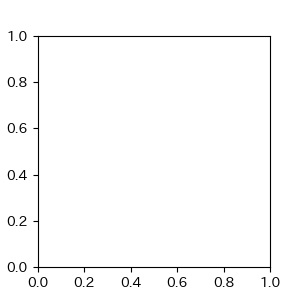

In [22]:
gui = Marubatsu_GUI(mb, ai=[None, None])